# A Finite Element Examples: Frame 01

This example is based on the frame01 example distributed with FEM.edu

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.solver.NewtonRaphsonSolver import *
from femedu.elements.Frame2D import *
from femedu.materials.ElasticSection import *

## Build a model

In [3]:
# ========== setting mesh parameters ==============

N = 8         # number of elements in the mesh
L = 100.0     # column free length


# ========== setting material parameters ==============

params = dict(
    E = 20000.,    # Young's modulus
    A = 100.0,     # cross section area
    I = 10.0       # cross section moment of inertia
)

# ========== setting load parameters ==============

w   = -0.1         # uniform lateral load on the column
Pcr = np.pi**2 * params['E'] * params['I'] / L**2    # Euler buckling load

# ========== setting analysis parameters ==============

target_load_level = 0.99      # 99% of Euler load
max_steps = 10                # solve max_steps points on the primary path


w   *= 0.01
Pcr *= 0.01
target_load_level = 99.      # 99% of Euler load



# define a list of target load levels
load_levels = np.linspace(0, target_load_level, max_steps)

#
# ==== Build the system model ====
#

model = System()
model.setSolver(NewtonRaphsonSolver())

# create nodes

nd0 = Node(0.0, 0.0)
model += nd0

ndi = nd0
for i in range(N):
    # nodes
    ndj = Node( (i+1)*L/N, 0.0 )
    model += ndj

    # elements
    elem = Frame2D(ndi, ndj, ElasticSection(params))
    model += elem

    # ** apply the element portion of the reference load
    elem.setDistLoad(w)

    ndi = ndj    # jump to next element: make current end-node the next start-node

# define support(s)

nd0.fixDOF('ux', 'uy')    # horizontal support left end
ndi.fixDOF('uy')          # vertical support right end

# ==== complete the reference load ====

# these are only nodal forces as part of the reference load
# .. load only the upper node
ndi.setLoad((-Pcr,), ('ux',))


## Analyze the model

In [4]:

model.solve(verbose=True)

model.report()


norm of the out-of-balance force:   1.9743e+00
norm of the out-of-balance force:   3.2920e-04
norm of the out-of-balance force:   9.2300e-11
+

System Analysis Report

Nodes:
---------------------
  Node_0:
      x:    [0. 0.]
      fix:  ['ux', 'uy']
      u:    [ 0.          0.         -0.00021041]
  Node_1:
      x:    [12.5  0. ]
      u:    [-1.23370055e-05 -2.55316324e-03 -1.92346700e-04]
  Node_2:
      x:    [25.  0.]
      u:    [-2.46740110e-05 -4.68537076e-03 -1.44693546e-04]
  Node_3:
      x:    [37.5  0. ]
      u:    [-3.70110165e-05 -6.08819829e-03 -7.72885446e-05]
  Node_4:
      x:    [50.  0.]
      u:    [-4.93480220e-05 -6.57640083e-03 -2.36600730e-15]
  Node_5:
      x:    [62.5  0. ]
      u:    [-6.16850275e-05 -6.08819829e-03  7.72885446e-05]
  Node_6:
      x:    [75.  0.]
      u:    [-7.40220330e-05 -4.68537076e-03  1.44693546e-04]
  Node_7:
      x:    [87.5  0. ]
      u:    [-8.63590385e-05 -2.55316324e-03  1.92346700e-04]
  Node_8:
      x:    [100.   0.

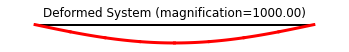

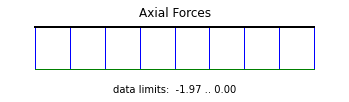

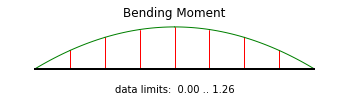

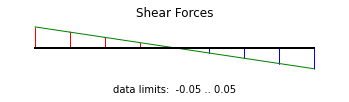

In [5]:
# create plots

model.plot(factor=1000.0, filename="frame1_deformed.png")

model.beamValuePlot("F", filename="frame1_force.png")
model.beamValuePlot("M", filename="frame1_moment.png")
model.beamValuePlot("V", filename="frame1_shear.png")

## Stability Analysis

In [6]:
# initialize the analysis:
model.resetDisplacements()   # set U to all zeros
model.initRecorder()         # sets variables to track; 
                             # defaults are load_level and stability index

model.setLoadFactor(0.0)     # define a known equilibrium solution

model.startRecorder()        # this starts the recording of requested variables

model.trackStability(True)   # this adds a stability check every recordThisStep()

# solve for all load_levels
for loadfactor in load_levels:

    # define node X2 as the controled node; downward direction is prescribed:
    model.setLoadFactor(loadfactor)
    model.solve(verbose=True)

    # stability check
    model.recordThisStep()   # run stability check and record history

    print("\n=== next load level ===\n")


norm of the out-of-balance force:   1.9743e+00
norm of the out-of-balance force:   1.5031e-14
+

 ** Stability check: (smallest eigenvalue of Kt) = 2.432144038297571


=== next load level ===

norm of the out-of-balance force:   2.1717e+01
norm of the out-of-balance force:   3.9834e-02
norm of the out-of-balance force:   3.5477e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 2.1646162526563075


=== next load level ===

norm of the out-of-balance force:   2.1717e+01
norm of the out-of-balance force:   8.9520e-02
norm of the out-of-balance force:   2.5228e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.897086480938334


=== next load level ===

norm of the out-of-balance force:   2.1717e+01
norm of the out-of-balance force:   1.5323e-01
norm of the out-of-balance force:   2.8292e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 1.6295547207298116


=== next load level ===

norm of the out-of-balance force:   2.1717e+01
norm of the out-of-balance force:   2.

In [7]:
#
# ==== check the current state of the model ===
#

model.report()


System Analysis Report

Nodes:
---------------------
  Node_0:
      x:    [0. 0.]
      fix:  ['ux', 'uy']
      u:    [ 0.          0.         -2.03292855]
  Node_1:
      x:    [12.5  0. ]
      u:    [-1.22136354e-03 -2.47624315e+01 -1.87795981e+00]
  Node_2:
      x:    [25.  0.]
      u:    [-2.44272709e-03 -4.57514676e+01 -1.43704758e+00]
  Node_3:
      x:    [37.5  0. ]
      u:    [-3.66409063e-03 -5.97734339e+01 -7.77608633e-01]
  Node_4:
      x:    [50.  0.]
      u:    [-4.88545418e-03 -6.46967903e+01 -5.13284623e-13]
  Node_5:
      x:    [62.5  0. ]
      u:    [-6.10681772e-03 -5.97734339e+01  7.77608633e-01]
  Node_6:
      x:    [75.  0.]
      u:    [-7.32818127e-03 -4.57514676e+01  1.43704758e+00]
  Node_7:
      x:    [87.5  0. ]
      u:    [-8.54954481e-03 -2.47624315e+01  1.87795981e+00]
  Node_8:
      x:    [100.   0.]
      fix:  ['uy']
      P:    [-1.97392088  0.          0.        ]
      u:    [-0.00977091  0.          2.03292855]

Elements:
-----------

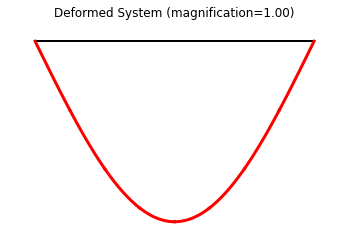

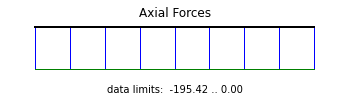

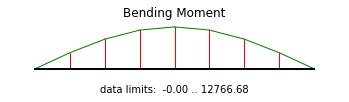

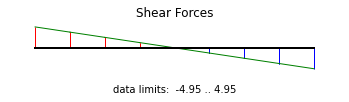

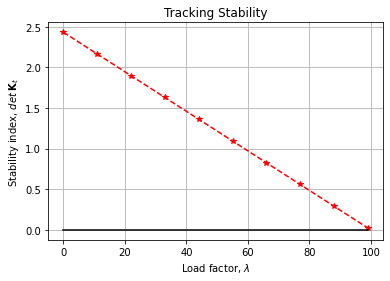

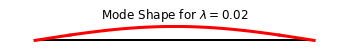

In [8]:
#
# ==== create some nice plots ===
#       
model.plot(factor=1.0)

model.beamValuePlot("F")
model.beamValuePlot("M")
model.beamValuePlot("V")

model.historyPlot('stability')
model.plotBucklingMode(factor=10., filename="frame1_buckling_mode0.png")
